In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('real_estate.csv') as file:
    content = file.readlines()
header = content[:1]
rows = [cell.strip() for cell in content[1:]]
x = [float(cells.split(',')[3]) for cells in rows]
y = [float(cells.split(',')[7]) for cells in rows]

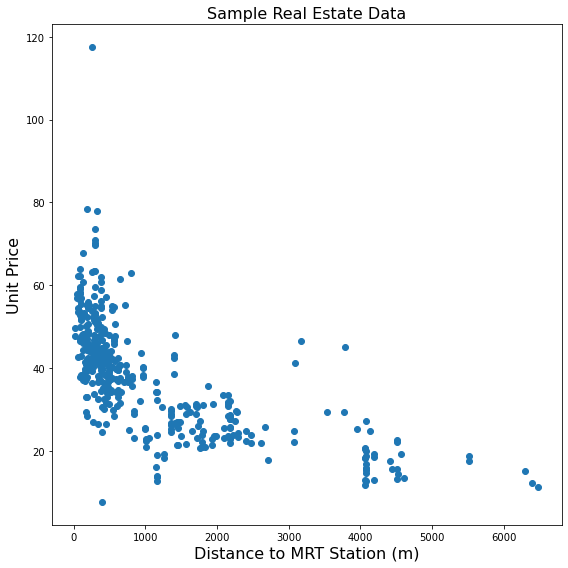

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(x,y)
ax.set_title("Sample Real Estate Data", fontsize=16)
ax.set_ylabel("Unit Price", fontsize=16)
ax.set_xlabel("Distance to MRT Station (m)", fontsize=16)

plt.tight_layout()
plt.show()

In [6]:
X_mat = np.vstack((np.ones(len(x)),x)).T
X_mat[0:5,]

array([[  1.     ,  84.87882],
       [  1.     , 306.5947 ],
       [  1.     , 561.9845 ],
       [  1.     , 561.9845 ],
       [  1.     , 390.5684 ]])

In [10]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [11]:
print(f"Regression Coefficient/Slope: {beta_hat[1]}")
print(f"Intercept: {beta_hat[0]}")

Regression Coefficient/Slope: -0.007262051618149435
Intercept: 45.85142705777495


In [7]:
yhat = X_mat.dot(beta_hat)

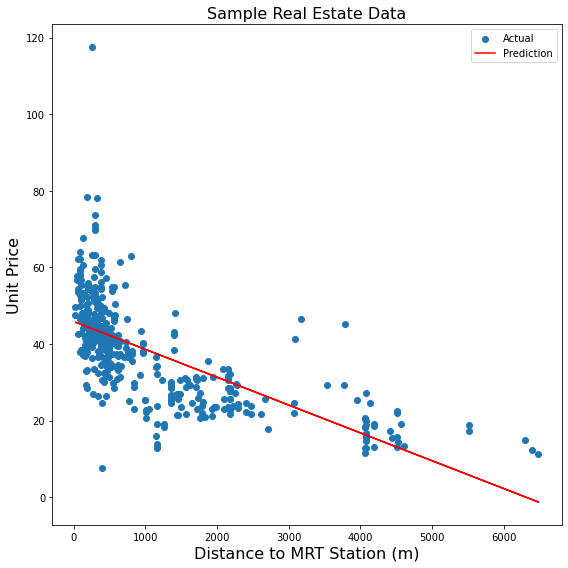

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(x,y, label='Actual')
ax.plot(x, yhat, color='red', label='Prediction')
ax.set_title("Sample Real Estate Data", fontsize=16)
ax.set_ylabel("Unit Price", fontsize=16)
ax.set_xlabel("Distance to MRT Station (m)", fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()

In [9]:
r_squared = 1 - (np.sum(np.square(y-yhat))/np.sum(np.square(y-np.average(y))))

In [10]:
print(f"R-squared Error: {r_squared:.3f}")

R-squared Error: 0.454


In [12]:
np.polyfit(x,y,1)

array([-7.26205162e-03,  4.58514271e+01])

In [14]:
residual_error = (y-yhat)

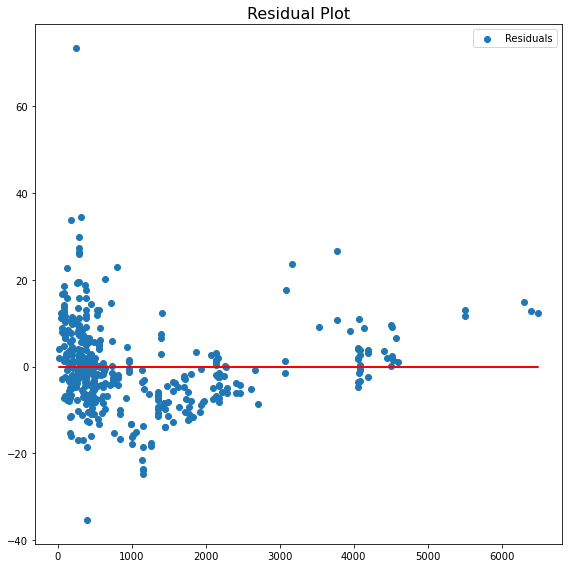

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(x,residual_error, label='Residuals')
ax.plot(x, np.zeros((len(x))), color='red')
ax.set_title("Residual Plot", fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()